In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [169]:
from google.colab import files
uploaded = files.upload()

Saving Project2_Training.xlsx to Project2_Training (4).xlsx


In [170]:
df_train = pd.read_excel('Project2_Training.xlsx')

In [171]:
df_train

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101886,2016-12-30,2000,SATURN,LS1 4DR,20000.0,20.0,NaN,NaN,NaN,20000.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
101887,2016-12-30,2004,HONDA,CIVIC EX 4DR,10000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
101888,2016-12-30,2011,KIA TRUCK/VAN,RIO,15000.0,9.0,NaN,NaN,NaN,28000.0,...,NaN,No,Single,Professional/Social,0,0,0,0,0,0
101889,2016-12-30,2005,PONTIAC,SUNFIRE SL 4DR,10000.0,30.0,NaN,NaN,NaN,500.0,...,NaN,No,Married,Not Known,0,0,0,0,0,1


Cleaning the VEHICLEMAKE column before because after joining the test and train data the space between two words is eliminated and the code wont work for it

In [173]:
# Display unique makes to confirm changes
df_train['VEHICLEMAKE'].unique()

array(['VOLKSWAGEN', 'HYUNDAI', 'CHEVROLET TRUCK/VAN', 'TOYOTA', 'HONDA',
       'PONTIAC TRUCK/VAN', 'KIA TRUCK/VAN', 'SMART', 'MAZDA',
       'HONDA TRUCK/VAN', 'BUICK TRUCK/VAN', 'CHEVROLET',
       'FORD TRUCK/VAN', 'TOYOTA TRUCK/VAN', 'LINCOLN TRUCK/VAN',
       'DODGE/RAM TRUCK/VAN', 'NISSAN', 'JEEP', 'MERCEDES-BENZ',
       'PONTIAC', 'INFINITI TRUCK/VAN', 'FORD', 'KIA', 'CHRYSLER', 'MINI',
       'SUBARU', 'ACURA', 'BMW TRUCK/VAN', 'GMC TRUCK/VAN', 'VOLVO',
       'BUICK', 'VOLKSWAGEN TRUCK/VAN', 'HYUNDAI TRUCK/VAN',
       'MERCURY TRUCK/VAN', 'NISSAN TRUCK/VAN', 'PORSCHE', 'BMW',
       'MAZDA TRUCK/VAN', 'LAND ROVER', 'DODGE', 'LEXUS TRUCK/VAN',
       'AUDI TRUCK/VAN', 'CADILLAC', 'SUZUKI', 'MERCEDES-BENZ TRUCK',
       'SATURN', 'BENTLEY', 'LEXUS', 'VOLVO TRUCK/VAN', 'SAAB', 'LINCOLN',
       'OLDSMOBILE', 'MITSUBISHI', 'AUDI', 'INFINITI',
       'MITSUBISHI TRUCK/VAN', 'MAZDA3', 'FIAT', 'JAGUAR TRUCK/VAN',
       'CHRYSLER TRUCK/VAN', 'SCION', 'SATURN TRUCK/VAN', 'JAGUAR'

In [175]:
make_patterns = {
    'FORD': [r'\bFORD\b.*', r'\bF150\b.*', r'\bF250\b.*', r'\bE350\b.*', r'\bMUSTANG\b.*', r'\bSHELBY\b.*', r'\bRANGER\b.*'],
    'CHEVROLET': [r'\bCHEV\b.*', r'\bCHEVROLET\b.*', r'\bCHEVROELT\b.*', r'\bCHEVRELOT\b.*', r'\bCHERVOLET\b.*',
                  r'\bCEVROLET\b.*', r'\bCHCVIOE\b.*', r'\bASTRO\b.*', r'\bCHEVROLE\b.*', r'\bZ28\b.*', r'\bCHEVY\b.*',
                  r'\bCORVETTE\b.*', r'\bCHEVROLER\b.*', r'\bEL CAMINO\b.*', r'\bMAILBOU\b.*',r'\bCHEVROLET\w*'],
'VOLKSWAGEN': [r'\bWV\b.*', r'\bVOLKSWAGEN\b.*', r'\bVOLKSWAGON\b.*', r'\bVOLGSWAGEN\b.*', r'\bVOLSWAGEN\b.*',
               r'\bVW\b.*', r'\bPASSAT\b.*', r'\bJETTA\b.*', r'\bVOLKSWAGENJAVASCRIPT:VOID\(\0\)\b.*', r'\bVOLLKS\b.*', r'\bVOLKS\b.*', r'\bVOLKSWAGENJAVASCRIPT:VOID\(0\)\b.*'],
    'HYUNDAI': [r'\bHYUNDAI\b.*', r'\bHUNDAY\b.*', r'\bHYNDAI\b.*', r'\bHYNDEI\b.*', r'\bELANTRA\b.*', r'\bHYUANDAI\b.*', r'\bHUNDAI\b.*',r'\bHYUNDIA\b'],
    'TOYOTA': [r'\bTOYOTA\b.*', r'\bTOYOATA\b.*', r'\bTOTOTA\b.*', r'\bTOYTO\b.*', r'\bMATRIX\b.*', r'\bSCION\b.*',
               r'\bCORROLLA\b.*', r'\bCOROLLA\b.*', r'\bCAMRY\b.*', r'\bCELICA\b.*', r'\bTOYOTO\b.*'],
    'HONDA': [r'\bHONDA\b.*', r'\bHONODA\b.*', r'\bCIVIC\b.*'],
    'PONTIAC': [r'\bPONTIAC\b.*', r'\bPONTIIAC\b.*', r'\bPOTIAC\b.*', r'\bMONTANA\b.*', r'\bPONITAC\b.*'],
    'KIA': [r'\bKIA\b.*'],
    'SMART': [r'\bSMART\b.*'],
    'MAZDA': [r'\bMAZDA\b.*', r'\bMADZA\b.*', r'\bMAZDS\b.*', r'\bMAZDA3\b.*'],
    'BUICK': [r'\bBUICK\b.*'],
    'LINCOLN': [r'\bLINCOLN\b.*'],
    'DODGE': [r'\bDODGE\b.*', r'\bRAM\b.*', r'\bDODGE RAM\b.*', r'\bCHALLENGER\b.*', r'\bDOGDE\b.*', r'\bDODDGE\b.*', r'\bGRAND\b.*'],
    'NISSAN': [r'\bNISSAN\b.*', r'\bNISAN\b.*', r'\bNISSIAN\b.*', r'\bNISSSAN\b.*', r'\bALTIMA\b.*', r'\b2XXXXXXXXXXXXXXXXXX\b.*', r'\bNISASN\b.*'],
    'JEEP': [r'\bJEEP\b.*', r'\bJEPP\b.*'],
    'MERCEDES-BENZ': [r'\bMERCEDES[-\s]?BENZ\b.*', r'\bMECEDEZ\b.*', r'\bMERCEDEZ\b.*', r'\bMERCEDES\b.*', r'\bMERZ\b.*'],
    'INFINITI': [r'\bINFINITI\b.*', r'\bINFINTI\b.*'],
    'CHRYSLER': [r'\bCHRYSLER\b.*', r'\bCRYSLER\b.*', r'\bCHRYLSER\b.*', r'\bCHRSYLER\b.*'],
    'MINI': [r'\bMINI\b.*'],
    'SUBARU': [r'\bSUBARU\b.*'],
    'ACURA': [r'\bACURA\b.*'],
    'BMW': [r'\bBMW\b.*'],
    'GMC': [r'\bGMC\b.*', r'\bSIERRA\b.*'],
    'VOLVO': [r'\bVOLVO\b.*'],
    'MERCURY': [r'\bMERCURY\b.*'],
    'PORSCHE': [r'\bPORSCHE\b.*', r'\bPROSCHE\b.*', r'\bPORCHE\b.*'],
    'LAND ROVER': [r'\bLAND ROVER\b.*', r'\bRANGE ROVER\b.*', r'\bLANDROVER\b.*', r'\bROVER\b.*'],
    'LEXUS': [r'\bLEXUS\b.*'],
    'AUDI': [r'\bAUDI\b.*'],
    'CADILLAC': [r'\bCADILLAC\b.*'],
    'SUZUKI': [r'\bSUZUKI\b.*', r'\bSPRINT\b.*'],
    'SATURN': [r'\bSATURN\b.*', r'\bVUE\b.*'],
    'BENTLEY': [r'\bBENTLEY\b.*'],
    'SAAB': [r'\bSAAB\b.*'],
    'OLDSMOBILE': [r'\bOLDSMOBILE\b.*', r'\bCUTLASS\b.*'],
    'MITSUBISHI': [r'\bMITSUBISHI\b.*', r'\bMITIBUSHI\b.*'],
    'FIAT': [r'\bFIAT\b.*'],
    'JAGUAR': [r'\bJAGUAR\b.*'],
    'ISUZU': [r'\bISUZU\b.*'],
    'YAMAHA': [r'\bYAMAHA\b.*'],
    'TESLA': [r'\bTESLA\b.*'],
    'PLYMOUTH': [r'\bPLYMOUTH\b.*', r'\bPLYMONTH\b.*'],
    'LAMBORGHINI': [r'\bLAMBORGHINI\b.*', r'\bDIABLO\b.*'],
    'KENWORTH': [r'\bKENWORTH\b.*'],
    'HINO': [r'\bHINO\b.*'],
    'HUMMER': [r'\bHUMMER\b.*'],
    'FREIGHTLINER': [r'\bFREIGHTLINER\b.*'],
    'FERRARI': [r'\bFERRARI\b.*'],
    'TRIUMPH': [r'\bTRIUMPH\b.*', r'\bTRIU\b.*'],
    'ASTON MARTIN': [r'\bASTON MARTIN\b.*'],
    'ROLLS ROYCE': [r'\bROLLS ROYCE\b.*'],
    'GEO': [r'\bGEO\b.*'],
    'HARLEY DAVIDSON': [r'\bHARILEY DAVIDSON\b.*', r'\bSTREET GLIDE SPECIAL\b.*', r'\bHARLEY\b.*'],
    'ARCTIC CAT': [r'\bARCTIC CAT\b.*', r'\bARTIC CAT\b.*', r'\bARTCIT CAT\b.*'],
    'BOMBARDIER': [r'\bBOMBARDIER\b.*', r'\bBOMBADIER\b.*'],
    'FOREST RIVER': [r'\bFOREST RIVER\b.*', r'\bFOREST\b.*'],
    'TRAIL LITE': [r'\bTRAIALLITE\b.*', r'\bTRAIL LIGHT\b.*', r'\bTRAILLITE\b.*'],
    'UNKNOWN': [r'\b1FTFW1EF8BFA01523\b.*', r'\bUNDISCLOSED\b.*', r'\bTRAVEL\b.*', r'\bCONVERTED\b.*',r'\bMONICO\b',r'\bCAR\b',r'\bKABUTO\b'],
    'ALFA ROMEO': [r'\bALFA ROMEO\b.*', r'\bALFA\b.*'],
    'MG': [r'\bMG\b.*', r'\bMGB\b.*', r'\bMGA\b.*'],
    'DIAHATSU': [r'\bDIHATSU\b.*'],
    'SKIDOO': [r'\bSKIDOO\b.*', r'\bSKI-DOO\b.*'],
    'MASERATI': [r'\bMASERATI\b.*', r'\bMAZERATI\b.*'],

}

# Apply patterns to standardize the 'VEHICLEMAKE' column in the dataset
for make, patterns in make_patterns.items():
    combined_pattern = '|'.join(patterns)
    df_train['VEHICLEMAKE'] = df_train['VEHICLEMAKE'].str.replace(combined_pattern, make, regex=True)

# Display unique makes to confirm changes
df_train['VEHICLEMAKE'].unique()

array(['VOLKSWAGEN', 'HYUNDAI', 'CHEVROLET', 'TOYOTA', 'HONDA', 'PONTIAC',
       'KIA', 'SMART', 'MAZDA', 'BUICK', 'FORD', 'LINCOLN', 'DODGE',
       'NISSAN', 'JEEP', 'MERCEDES-BENZ', 'INFINITI', 'CHRYSLER', 'MINI',
       'SUBARU', 'ACURA', 'BMW', 'GMC', 'VOLVO', 'MERCURY', 'PORSCHE',
       'LAND ROVER', 'LEXUS', 'AUDI', 'CADILLAC', 'SUZUKI', 'SATURN',
       'BENTLEY', 'SAAB', 'OLDSMOBILE', 'MITSUBISHI', 'FIAT', 'JAGUAR',
       'LADA', 'MASERATI', 'UNKNOWN', 'ISUZU', 'YAMAHA', 'GEO', 'TESLA',
       'PLYMOUTH', 'LAMBORGHINI', 'KENWORTH', 'HINO', 'HUMMER',
       'CHYRSLER', 'ALFA ROMEO', 'PONTAIC', 'FREIGHTLINER', 'FERRARI',
       'TRIUMPH', 'ARCTIC CAT', 'COACHMEN', 'AMERICAN MOTORS',
       'MOBILITY VENTURES', 'ASTON MARTIN', 'EAGLE', 'BRICKLIN',
       'FOREST RIVER', 'RYMCO', 'ACCURA', 'INTERNATIONAL', 'ROLLS ROYCE',
       'HARLEY DAVIDSON', 'SCOOTTERRE', 'MG', 'TRIPLE E', 'KTM',
       'MCLAREN', 'AUSTIN-HEALEY', 'BLUE BIRD CORP', 'SKIDOO', 'AMC',
       'HIGH COUNTRY', '

FIX Javascript

In [176]:
from google.colab import files
uploaded = files.upload()

Saving Project2_Test.xlsx to Project2_Test (6).xlsx


In [177]:
df_test = pd.read_excel('Project2_Test.xlsx')
df_test

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUALKM,COMMUTEDISTANCE,MARKINGSYSTEM,TRACKINGSYSTEM,VEHICLEOWNERSHIP,VEHICLEVALUE,...,YEARSLICENSED,YEARSASPRINCIPALDRIVER,MULTIPRODUCT,MARITALSTATUS,OCCUPATION,CONVICTIONCOUNTMINOR3YRS,CONVICTIONCOUNTMAJOR3YRS,CONVICTIONCOUNTCRIMINAL3YRS,ASSIGNEDLOSSESPD5YRS,SUSPENSIONCOUNT
0,2017-01-03,2002,HONDA,CIVIC EX 2DR COUPE [U.S. MODEL],10000,4.0,NaN,NaN,NaN,NaN,...,7.0,NaN,No,Single,Not Known,0,0,0,0,0
1,2017-01-04,2010,FORD TRUCK/VAN,F150 XLT SUPERCREW 4WD,10000,10.0,NaN,NaN,NaN,NaN,...,13.0,NaN,Yes,Single,Not Known,0,0,0,0,0
2,2017-01-04,2017,DODGE/RAM TRUCK/VAN,RAM 1500 REBEL CREW CAB 4WD,9000,3.0,NaN,NaN,Owned,72000.0,...,33.0,NaN,Yes,Single,Not Known,0,0,0,0,0
3,2017-01-04,2013,DODGE/RAM TRUCK/VAN,RAM 1500 SPORT CREW CAB 4WD,10000,10.0,NaN,NaN,NaN,55000.0,...,9.0,NaN,No,Single,Not Known,0,0,0,0,0
4,2017-01-04,2014,FORD,FOCUS SE 4DR,20000,10.0,NaN,NaN,NaN,NaN,...,4.0,NaN,No,Single,Student,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15109,2017-02-27,2012,HONDA,CIVIC DX 4DR,20000,16.0,NaN,NaN,NaN,NaN,...,9.0,NaN,Yes,Single,Not Known,0,0,0,0,0
15110,2017-02-27,2011,BMW,323i 4DR,10000,8.0,NaN,NaN,NaN,12418.0,...,27.0,NaN,Yes,Married,Not Known,0,0,0,0,0
15111,2017-02-27,2007,HONDA TRUCK/VAN,ODYSSEY LX,15000,5.0,NaN,NaN,NaN,NaN,...,32.0,NaN,Yes,Married,Not Known,0,0,0,0,0
15112,2017-02-27,2014,HONDA TRUCK/VAN,CRV,12000,13.0,NaN,NaN,NaN,35000.0,...,9.0,NaN,Yes,Single,Not Known,0,0,0,0,0


In [178]:
# Display unique makes to confirm changes
df_test['VEHICLEMAKE'].unique()

array(['HONDA', 'FORD TRUCK/VAN', 'DODGE/RAM TRUCK/VAN', 'FORD',
       'CHEVROLET TRUCK/VAN', 'GMC TRUCK/VAN', 'BMW TRUCK/VAN', 'ACURA',
       'TOYOTA', 'TOYOTA TRUCK/VAN', 'CHRYSLER', 'KIA', 'MAZDA TRUCK/VAN',
       'CHEVROLET', 'MAZDA', 'NISSAN TRUCK/VAN', 'MITSUBISHI',
       'HYUNDAI TRUCK/VAN', 'PONTIAC', 'KIA TRUCK/VAN', 'NISSAN',
       'LEXUS TRUCK/VAN', 'MERCEDES-BENZ TRUCK', 'VOLKSWAGEN TRUCK/VAN',
       'BUICK', 'VOLKSWAGEN', 'VOLVO', 'MERCEDES-BENZ', 'HONDA TRUCK/VAN',
       'HYUNDAI', 'BMW', 'INFINITI TRUCK/VAN', 'CADILLAC TRUCK/VAN',
       'JEEP', 'HYUNDAI CAMION/VAN', 'MITSUBISHI TRUCK/VAN',
       'BUICK TRUCK/VAN', 'SUBARU', 'FORD CAMION/VAN', 'MERZ',
       'LINCOLN TRUCK/VAN', 'CHRYSLER TRUCK/VAN', 'DODGE',
       'PONTIAC TRUCK/VAN', 'LEXUS', 'MERCURY', 'SATURN TRUCK/VAN',
       'OLDSMOBILE', 'AUDI', 'PORSCHE TRUCK/VAN', 'MASERATI', 'CADILLAC',
       'VOLVO TRUCK/VAN', 'AUDI TRUCK/VAN', 'MINI', 'LAND ROVER',
       'ACURA TRUCK/VAN', 'LEXUS CAMION/VAN', 'INF

In [179]:
make_patterns = {
    'FORD': [r'\bFORD\b.*', r'\bF150\b.*', r'\bF250\b.*', r'\bE350\b.*', r'\bMUSTANG\b.*', r'\bSHELBY\b.*', r'\bRANGER\b.*'],
    'CHEVROLET': [r'\bCHEV\b.*', r'\bCHEVROLET\b.*', r'\bCHEVROELT\b.*', r'\bCHEVRELOT\b.*', r'\bCHERVOLET\b.*',
                  r'\bCEVROLET\b.*', r'\bCHCVIOE\b.*', r'\bASTRO\b.*', r'\bCHEVROLE\b.*', r'\bZ28\b.*', r'\bCHEVY\b.*',
                  r'\bCORVETTE\b.*', r'\bCHEVROLER\b.*', r'\bEL CAMINO\b.*', r'\bMAILBOU\b.*',r'\bCHEVROLET\w*'],
'VOLKSWAGEN': [r'\bWV\b.*', r'\bVOLKSWAGEN\b.*', r'\bVOLKSWAGON\b.*', r'\bVOLGSWAGEN\b.*', r'\bVOLSWAGEN\b.*',
               r'\bVW\b.*', r'\bPASSAT\b.*', r'\bJETTA\b.*', r'\bVOLKSWAGENJAVASCRIPT:VOID\(\0\)\b.*', r'\bVOLLKS\b.*', r'\bVOLKS\b.*', r'\bVOLKSWAGENJAVASCRIPT:VOID\(0\)\b.*'],
    'HYUNDAI': [r'\bHYUNDAI\b.*', r'\bHUNDAY\b.*', r'\bHYNDAI\b.*', r'\bHYNDEI\b.*', r'\bELANTRA\b.*', r'\bHYUANDAI\b.*', r'\bHUNDAI\b.*',r'\bHYUNDIA\b'],
    'TOYOTA': [r'\bTOYOTA\b.*', r'\bTOYOATA\b.*', r'\bTOTOTA\b.*', r'\bTOYTO\b.*', r'\bMATRIX\b.*', r'\bSCION\b.*',
               r'\bCORROLLA\b.*', r'\bCOROLLA\b.*', r'\bCAMRY\b.*', r'\bCELICA\b.*', r'\bTOYOTO\b.*'],
    'HONDA': [r'\bHONDA\b.*', r'\bHONODA\b.*', r'\bCIVIC\b.*'],
    'PONTIAC': [r'\bPONTIAC\b.*', r'\bPONTIIAC\b.*', r'\bPOTIAC\b.*', r'\bMONTANA\b.*', r'\bPONITAC\b.*'],
    'KIA': [r'\bKIA\b.*'],
    'SMART': [r'\bSMART\b.*'],
    'MAZDA': [r'\bMAZDA\b.*', r'\bMADZA\b.*', r'\bMAZDS\b.*', r'\bMAZDA3\b.*'],
    'BUICK': [r'\bBUICK\b.*'],
    'LINCOLN': [r'\bLINCOLN\b.*'],
    'DODGE': [r'\bDODGE\b.*', r'\bRAM\b.*', r'\bDODGE RAM\b.*', r'\bCHALLENGER\b.*', r'\bDOGDE\b.*', r'\bDODDGE\b.*', r'\bGRAND\b.*'],
    'NISSAN': [r'\bNISSAN\b.*', r'\bNISAN\b.*', r'\bNISSIAN\b.*', r'\bNISSSAN\b.*', r'\bALTIMA\b.*', r'\b2XXXXXXXXXXXXXXXXXX\b.*', r'\bNISASN\b.*'],
    'JEEP': [r'\bJEEP\b.*', r'\bJEPP\b.*'],
    'MERCEDES-BENZ': [r'\bMERCEDES[-\s]?BENZ\b.*', r'\bMECEDEZ\b.*', r'\bMERCEDEZ\b.*', r'\bMERCEDES\b.*', r'\bMERZ\b.*'],
    'INFINITI': [r'\bINFINITI\b.*', r'\bINFINTI\b.*'],
    'CHRYSLER': [r'\bCHRYSLER\b.*', r'\bCRYSLER\b.*', r'\bCHRYLSER\b.*', r'\bCHRSYLER\b.*'],
    'MINI': [r'\bMINI\b.*'],
    'SUBARU': [r'\bSUBARU\b.*'],
    'ACURA': [r'\bACURA\b.*'],
    'BMW': [r'\bBMW\b.*'],
    'GMC': [r'\bGMC\b.*', r'\bSIERRA\b.*'],
    'VOLVO': [r'\bVOLVO\b.*'],
    'MERCURY': [r'\bMERCURY\b.*'],
    'PORSCHE': [r'\bPORSCHE\b.*', r'\bPROSCHE\b.*', r'\bPORCHE\b.*'],
    'LAND ROVER': [r'\bLAND ROVER\b.*', r'\bRANGE ROVER\b.*', r'\bLANDROVER\b.*', r'\bROVER\b.*'],
    'LEXUS': [r'\bLEXUS\b.*'],
    'AUDI': [r'\bAUDI\b.*'],
    'CADILLAC': [r'\bCADILLAC\b.*'],
    'SUZUKI': [r'\bSUZUKI\b.*', r'\bSPRINT\b.*'],
    'SATURN': [r'\bSATURN\b.*', r'\bVUE\b.*'],
    'BENTLEY': [r'\bBENTLEY\b.*'],
    'SAAB': [r'\bSAAB\b.*'],
    'OLDSMOBILE': [r'\bOLDSMOBILE\b.*', r'\bCUTLASS\b.*'],
    'MITSUBISHI': [r'\bMITSUBISHI\b.*', r'\bMITIBUSHI\b.*'],
    'FIAT': [r'\bFIAT\b.*'],
    'JAGUAR': [r'\bJAGUAR\b.*'],
    'ISUZU': [r'\bISUZU\b.*'],
    'YAMAHA': [r'\bYAMAHA\b.*'],
    'TESLA': [r'\bTESLA\b.*'],
    'PLYMOUTH': [r'\bPLYMOUTH\b.*', r'\bPLYMONTH\b.*'],
    'LAMBORGHINI': [r'\bLAMBORGHINI\b.*', r'\bDIABLO\b.*'],
    'KENWORTH': [r'\bKENWORTH\b.*'],
    'HINO': [r'\bHINO\b.*'],
    'HUMMER': [r'\bHUMMER\b.*'],
    'FREIGHTLINER': [r'\bFREIGHTLINER\b.*'],
    'FERRARI': [r'\bFERRARI\b.*'],
    'TRIUMPH': [r'\bTRIUMPH\b.*', r'\bTRIU\b.*'],
    'ASTON MARTIN': [r'\bASTON MARTIN\b.*'],
    'ROLLS ROYCE': [r'\bROLLS ROYCE\b.*'],
    'GEO': [r'\bGEO\b.*'],
    'HARLEY DAVIDSON': [r'\bHARILEY DAVIDSON\b.*', r'\bSTREET GLIDE SPECIAL\b.*', r'\bHARLEY\b.*'],
    'ARCTIC CAT': [r'\bARCTIC CAT\b.*', r'\bARTIC CAT\b.*', r'\bARTCIT CAT\b.*'],
    'BOMBARDIER': [r'\bBOMBARDIER\b.*', r'\bBOMBADIER\b.*'],
    'FOREST RIVER': [r'\bFOREST RIVER\b.*', r'\bFOREST\b.*'],
    'TRAIL LITE': [r'\bTRAIALLITE\b.*', r'\bTRAIL LIGHT\b.*', r'\bTRAILLITE\b.*'],
    'UNKNOWN': [r'\b1FTFW1EF8BFA01523\b.*', r'\bUNDISCLOSED\b.*', r'\bTRAVEL\b.*', r'\bCONVERTED\b.*',r'\bMONICO\b',r'\bCAR\b',r'\bKABUTO\b',r'\bUNITED\b'],
    'ALFA ROMEO': [r'\bALFA ROMEO\b.*', r'\bALFA\b.*'],
    'MG': [r'\bMG\b.*', r'\bMGB\b.*', r'\bMGA\b.*'],
    'DIAHATSU': [r'\bDIHATSU\b.*'],
    'SKIDOO': [r'\bSKIDOO\b.*', r'\bSKI-DOO\b.*'],
    'MASERATI': [r'\bMASERATI\b.*', r'\bMAZERATI\b.*'],

}

# Apply patterns to standardize the 'VEHICLEMAKE' column in the dataset
for make, patterns in make_patterns.items():
    combined_pattern = '|'.join(patterns)
    df_test['VEHICLEMAKE'] = df_test['VEHICLEMAKE'].str.replace(combined_pattern, make, regex=True)

# Display unique makes to confirm changes
df_test['VEHICLEMAKE'].unique()

array(['HONDA', 'FORD', 'DODGE', 'CHEVROLET', 'GMC', 'BMW', 'ACURA',
       'TOYOTA', 'CHRYSLER', 'KIA', 'MAZDA', 'NISSAN', 'MITSUBISHI',
       'HYUNDAI', 'PONTIAC', 'LEXUS', 'MERCEDES-BENZ', 'VOLKSWAGEN',
       'BUICK', 'VOLVO', 'INFINITI', 'CADILLAC', 'JEEP', 'SUBARU',
       'LINCOLN', 'MERCURY', 'SATURN', 'OLDSMOBILE', 'AUDI', 'PORSCHE',
       'MASERATI', 'MINI', 'LAND ROVER', 'FIAT', 'SUZUKI', 'HUMMER',
       'PLYMOUTH', 'SAAB', 'JAGUAR', 'SMART', 'INTERNATIONAL', 'DATSUN',
       'MG', 'BENTLEY', 'AM GENERAL', 'MCLAREN', 'TESLA', 'LAMBORGHINI',
       'UNKNOWN', 'DIAHATSU', 'ROLLS ROYCE', 'FISKER', 'YAMAHA',
       'ASTON MARTIN', 'GEO', 'ALFA ROMEO', 'ROYAL'], dtype=object)

## Data Pre-processing

In [180]:
print(df_train.columns)

Index(['QUOTEDATE', 'VEHICLEYEAR', 'VEHICLEMAKE', 'VEHICLEMODEL', 'ANNUAL_KM',
       'COMMUTE_DISTANCE', 'MARKING_SYSTEM', 'TRACKING_SYSTEM',
       'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'VEHICLEUSE', 'GENDER',
       'YEAR_OF_BIRTH', 'POSTAL_CODE', 'AREA_CODE', 'YEARS_LICENSED',
       'YEARS_AS_PRINCIPAL_DRIVER', 'MULTI_PRODUCT', 'MARITAL_STATUS',
       'OCCUPATION', 'CONVICTION_COUNT_MINOR_3YRS',
       'CONVICTION_COUNT_MAJOR_3YRS', 'CONVICTION_COUNT_CRIMINAL_3YRS',
       'ASSIGNED_LOSSES_PD_5YRS', 'SUSPENSION_COUNT', 'IS_BOUND'],
      dtype='object')


In [181]:
print(df_test.columns)

Index(['QUOTEDATE', 'VEHICLEYEAR', 'VEHICLEMAKE', 'VEHICLEMODEL', 'ANNUALKM',
       'COMMUTEDISTANCE', 'MARKINGSYSTEM', 'TRACKINGSYSTEM',
       'VEHICLEOWNERSHIP', 'VEHICLEVALUE', 'VEHICLEUSE', 'GENDER',
       'YEAROFBIRTH', 'POSTALCODE', 'AREACODE', 'YEARSLICENSED',
       'YEARSASPRINCIPALDRIVER', 'MULTIPRODUCT', 'MARITALSTATUS', 'OCCUPATION',
       'CONVICTIONCOUNTMINOR3YRS', 'CONVICTIONCOUNTMAJOR3YRS',
       'CONVICTIONCOUNTCRIMINAL3YRS', 'ASSIGNEDLOSSESPD5YRS',
       'SUSPENSIONCOUNT'],
      dtype='object')


### Change names of columns to make them similar in train and test dataset

ANNUAL_KM = ANNUALKM

COMMUTE_DISTANCE = COMMUTEDISTANCE

MARKING_SYSTEM = MARKINGSYSTEM

TRACKING_SYSTEM = TRACKINGSYSTEM

VEHICLE_OWNERSHIP = VEHICLE_OWNERSHIP

VEHICLE_VALUE = VEHICLEVALUE

YEAR_OF_BIRTH = YEAROFBIRTH

POSTAL_CODE = POSTALCODE

AREA_CODE = AREACODE

YEARS_LICENSED = YEARSLICENSED

YEARS_AS_PRINCIPAL_DRIVER = YEARSASPRINCIPALDRIVER

MULTI_PRODUCT = MULTIPRODUCT

MARITAL_STATUS = MARITALSTATUS

CONVICTION_COUNT_MINOR_3YRS = CONVICTIONCOUNTMINOR3YRS

CONVICTION_COUNT_MAJOR_3YRS = CONVICTIONCOUNTMAJOR3YRS

CONVICTION_COUNT_CRIMINAL_3YRS = CONVICTIONCOUNTCRIMINAL3YRS

ASSIGNED_LOSSES_PD_5YRS = ASSIGNEDLOSSESPD5YRS

SUSPENSION_COUNT = SUSPENSIONCOUNT

In [182]:
# Change column names for better reading
df_train = df_train.rename(
    columns = {'QUOTEDATE' : 'QUOTE_DATE',
               'VEHICLEYEAR' : 'VEHICLE_YEAR',
               'VEHICLEMAKE' : 'VEHICLE_MAKE',
               'VEHICLEMODEL' : 'VEHICLE_MODEL',
               'VEHICLEUSE' : 'VEHICLE_USE',})
print(df_train.columns)

Index(['QUOTE_DATE', 'VEHICLE_YEAR', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'ANNUAL_KM', 'COMMUTE_DISTANCE', 'MARKING_SYSTEM', 'TRACKING_SYSTEM',
       'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'VEHICLE_USE', 'GENDER',
       'YEAR_OF_BIRTH', 'POSTAL_CODE', 'AREA_CODE', 'YEARS_LICENSED',
       'YEARS_AS_PRINCIPAL_DRIVER', 'MULTI_PRODUCT', 'MARITAL_STATUS',
       'OCCUPATION', 'CONVICTION_COUNT_MINOR_3YRS',
       'CONVICTION_COUNT_MAJOR_3YRS', 'CONVICTION_COUNT_CRIMINAL_3YRS',
       'ASSIGNED_LOSSES_PD_5YRS', 'SUSPENSION_COUNT', 'IS_BOUND'],
      dtype='object')


In [183]:
print(df_test.columns)

Index(['QUOTEDATE', 'VEHICLEYEAR', 'VEHICLEMAKE', 'VEHICLEMODEL', 'ANNUALKM',
       'COMMUTEDISTANCE', 'MARKINGSYSTEM', 'TRACKINGSYSTEM',
       'VEHICLEOWNERSHIP', 'VEHICLEVALUE', 'VEHICLEUSE', 'GENDER',
       'YEAROFBIRTH', 'POSTALCODE', 'AREACODE', 'YEARSLICENSED',
       'YEARSASPRINCIPALDRIVER', 'MULTIPRODUCT', 'MARITALSTATUS', 'OCCUPATION',
       'CONVICTIONCOUNTMINOR3YRS', 'CONVICTIONCOUNTMAJOR3YRS',
       'CONVICTIONCOUNTCRIMINAL3YRS', 'ASSIGNEDLOSSESPD5YRS',
       'SUSPENSIONCOUNT'],
      dtype='object')


In [184]:
# Change column names as df_train
df_test = df_test.rename(
    columns={'QUOTEDATE' : 'QUOTE_DATE',
             'VEHICLEYEAR' : 'VEHICLE_YEAR',
             'VEHICLEMAKE' : 'VEHICLE_MAKE',
             'VEHICLEMODEL' : 'VEHICLE_MODEL',
             'ANNUALKM': 'ANNUAL_KM',
             'COMMUTEDISTANCE' : 'COMMUTE_DISTANCE',
             'MARKINGSYSTEM' : 'MARKING_SYSTEM',
             'TRACKINGSYSTEM' : 'TRACKING_SYSTEM',
             'VEHICLEOWNERSHIP' : 'VEHICLE_OWNERSHIP',
             'VEHICLEVALUE' : 'VEHICLE_VALUE',
             'VEHICLEUSE' : 'VEHICLE_USE',
             'YEAROFBIRTH' : 'YEAR_OF_BIRTH',
             'POSTALCODE' : 'POSTAL_CODE',
             'AREACODE' : 'AREA_CODE',
             'YEARSLICENSED' : 'YEARS_LICENSED',
             'YEARSASPRINCIPALDRIVER' : 'YEARS_AS_PRINCIPAL_DRIVER',
             'MULTIPRODUCT' : 'MULTI_PRODUCT',
             'MARITALSTATUS' : 'MARITAL_STATUS',
             'CONVICTIONCOUNTMINOR3YRS' : 'CONVICTION_COUNT_MINOR_3YRS',
             'CONVICTIONCOUNTMAJOR3YRS' : 'CONVICTION_COUNT_MAJOR_3YRS',
             'CONVICTIONCOUNTCRIMINAL3YRS' : 'CONVICTION_COUNT_CRIMINAL_3YRS',
             'ASSIGNEDLOSSESPD5YRS' : 'ASSIGNED_LOSSES_PD_5YRS',
             'SUSPENSIONCOUNT' : 'SUSPENSION_COUNT'})
print(df_test.columns)

Index(['QUOTE_DATE', 'VEHICLE_YEAR', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'ANNUAL_KM', 'COMMUTE_DISTANCE', 'MARKING_SYSTEM', 'TRACKING_SYSTEM',
       'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'VEHICLE_USE', 'GENDER',
       'YEAR_OF_BIRTH', 'POSTAL_CODE', 'AREA_CODE', 'YEARS_LICENSED',
       'YEARS_AS_PRINCIPAL_DRIVER', 'MULTI_PRODUCT', 'MARITAL_STATUS',
       'OCCUPATION', 'CONVICTION_COUNT_MINOR_3YRS',
       'CONVICTION_COUNT_MAJOR_3YRS', 'CONVICTION_COUNT_CRIMINAL_3YRS',
       'ASSIGNED_LOSSES_PD_5YRS', 'SUSPENSION_COUNT'],
      dtype='object')


In [185]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101891 entries, 0 to 101890
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   QUOTE_DATE                      101891 non-null  datetime64[ns]
 1   VEHICLE_YEAR                    101891 non-null  int64         
 2   VEHICLE_MAKE                    101891 non-null  object        
 3   VEHICLE_MODEL                   101891 non-null  object        
 4   ANNUAL_KM                       101890 non-null  float64       
 5   COMMUTE_DISTANCE                66478 non-null   float64       
 6   MARKING_SYSTEM                  25 non-null      object        
 7   TRACKING_SYSTEM                 4 non-null       object        
 8   VEHICLE_OWNERSHIP               25441 non-null   object        
 9   VEHICLE_VALUE                   37218 non-null   float64       
 10  VEHICLE_USE                     101891 non-null  object 

In [186]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   QUOTE_DATE                      15114 non-null  datetime64[ns]
 1   VEHICLE_YEAR                    15114 non-null  int64         
 2   VEHICLE_MAKE                    15114 non-null  object        
 3   VEHICLE_MODEL                   15114 non-null  object        
 4   ANNUAL_KM                       15114 non-null  int64         
 5   COMMUTE_DISTANCE                9923 non-null   float64       
 6   MARKING_SYSTEM                  19 non-null     object        
 7   TRACKING_SYSTEM                 2 non-null      object        
 8   VEHICLE_OWNERSHIP               3614 non-null   object        
 9   VEHICLE_VALUE                   4955 non-null   float64       
 10  VEHICLE_USE                     15114 non-null  object        
 11  GE

### Merge the dataset fot pre processing

We will join df_train & df_test for pre processing cause we can perform pre processing just once and and then split them back to train and test

In [187]:
# Join both the datasets
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
df

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0.0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0.0
2,2016-01-02,2015,CHEVROLET,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0.0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117000,2017-02-27,2012,HONDA,CIVIC DX 4DR,20000.0,16.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,NaN
117001,2017-02-27,2011,BMW,323i 4DR,10000.0,8.0,NaN,NaN,NaN,12418.0,...,NaN,Yes,Married,Not Known,0,0,0,0,0,NaN
117002,2017-02-27,2007,HONDA,ODYSSEY LX,15000.0,5.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Married,Not Known,0,0,0,0,0,NaN
117003,2017-02-27,2014,HONDA,CRV,12000.0,13.0,NaN,NaN,NaN,35000.0,...,NaN,Yes,Single,Not Known,0,0,0,0,0,NaN


### Having a look at target variable

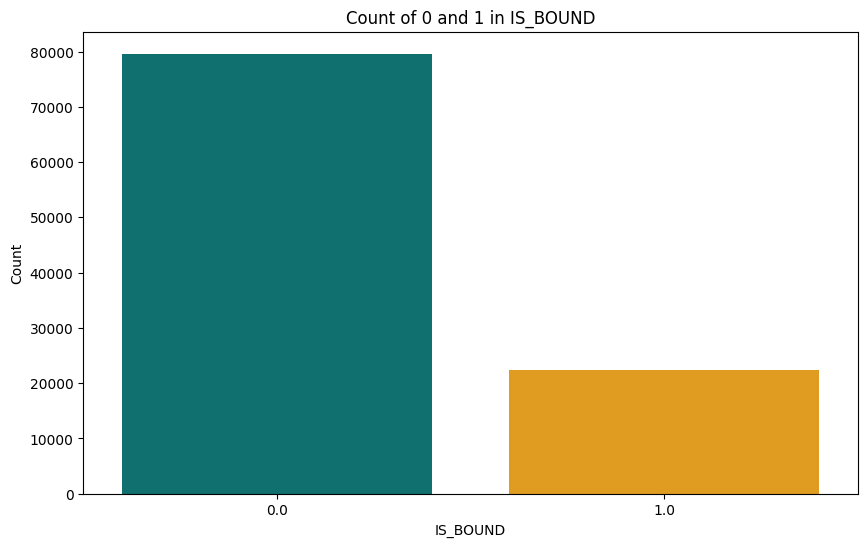

In [188]:
plt.figure(figsize=(10, 6))
sns.countplot(x='IS_BOUND', data=df, palette=['Teal', 'Orange'])
plt.title('Count of 0 and 1 in IS_BOUND')
plt.xlabel('IS_BOUND')
plt.ylabel('Count')
plt.show()

Our tagert variable "IS_BOUND" is imbalanced and this can cause issue during classification so we will tackle this imbalance data problem before model training in fututre

### Handling Missing values

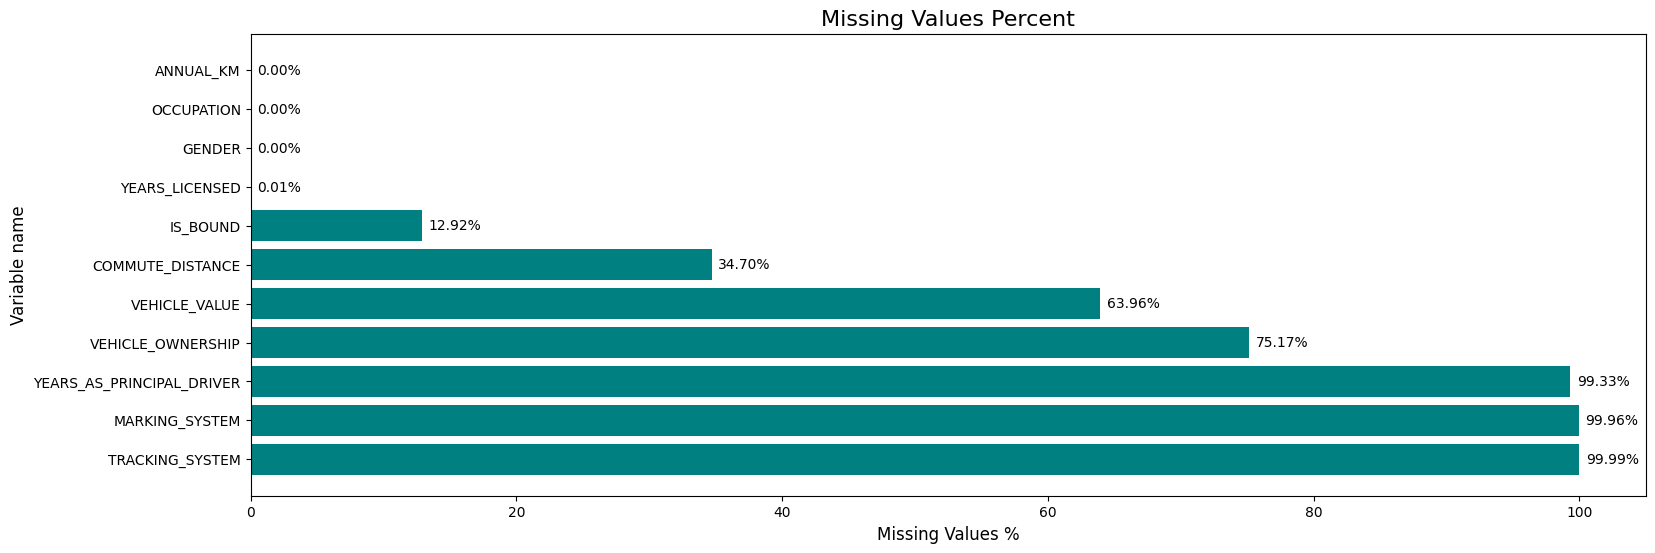

In [190]:
# Plot to visualize percent of missing values
percent = df.isnull().mean() * 100
percent = percent[percent > 0]
percent.sort_values(inplace=True)

# Plotting the missing data percentages
plt.figure(figsize=(18,6))
bars = plt.barh(percent.index, percent.values, color='Teal')
plt.title('Missing Values Percent', fontsize=16)
plt.xlabel('Missing Values %', fontsize=12)
plt.ylabel('Variable name', fontsize=12)
plt.gca().invert_yaxis()
for index, value in enumerate(percent.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')
plt.show()

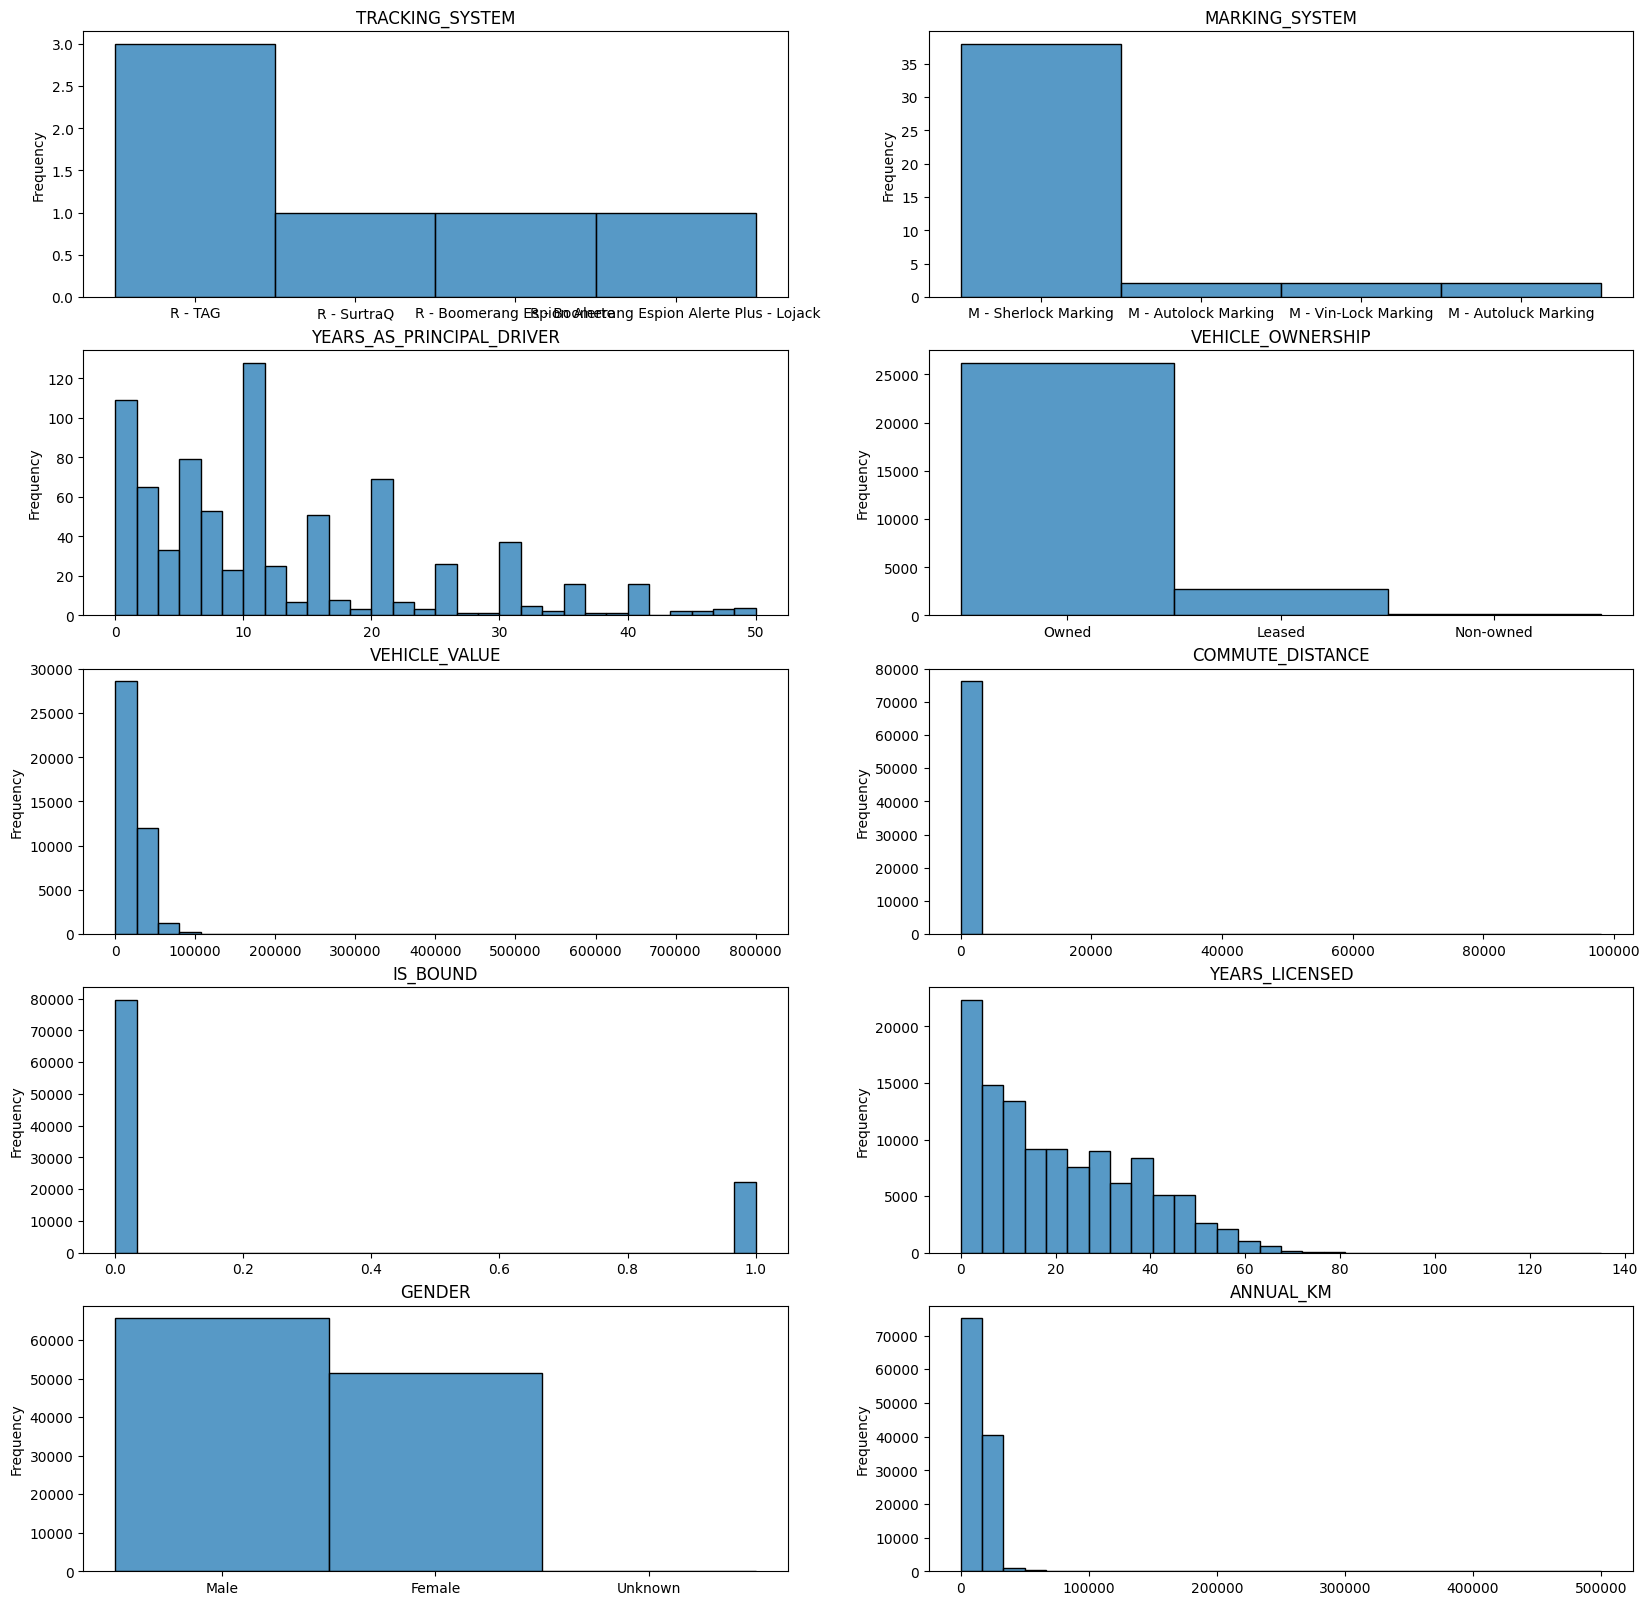

In [201]:
# Assuming your dataframe is named df and contains the columns listed
columns_to_plot = [
    'TRACKING_SYSTEM', 'MARKING_SYSTEM', 'YEARS_AS_PRINCIPAL_DRIVER',
    'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'COMMUTE_DISTANCE',
    'IS_BOUND', 'YEARS_LICENSED', 'GENDER', 'ANNUAL_KM'
]

# Settings for the trainee
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[column],bins=30)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Frequency')


plt.show()

Looking at the histograms we can easily figure out that most of our data contains categorical values which we need to deal with, there are some missing values in the dataset as well as most of our data is skewed heavily. We will make decision on null values depending on the column type and its importance ahead.

In [202]:
# Calculating percent of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(12))

                            Total    Percent
TRACKING_SYSTEM            116999  99.994872
MARKING_SYSTEM             116961  99.962395
YEARS_AS_PRINCIPAL_DRIVER  116225  99.333362
VEHICLE_OWNERSHIP           87950  75.167728
VEHICLE_VALUE               74832  63.956241
COMMUTE_DISTANCE            40604  34.702790
IS_BOUND                    15114  12.917397
YEARS_LICENSED                 11   0.009401
GENDER                          5   0.004273
ANNUAL_KM                       1   0.000855
OCCUPATION                      1   0.000855
ASSIGNED_LOSSES_PD_5YRS         0   0.000000


In [204]:
# Filling null values in TRACKING_SYSTEM & MARKING_SYSTEM with None
df['TRACKING_SYSTEM'].fillna("NaN", inplace=True)
df['MARKING_SYSTEM'].fillna("NaN", inplace=True)

IN "YEARS_AS_PRINCIPAL_DRIVER" 99% data is missing and looking at description it does not look it as an other related features so just drop this

In [205]:
df.drop('YEARS_AS_PRINCIPAL_DRIVER', axis=1, inplace=True)

"VEHICLE_OWNERSHIP" column description suggests if it has null values means the car owner has not mentioned whether the car is owned, leased, or non owned so put unknown

In [206]:
df['VEHICLE_OWNERSHIP'].fillna("Unknown", inplace=True)

For Gender column there are 5 values missing we can do two things either drop the rows since the dataset is large enough dropping 5 rows wont affect much OR we can impute Unkown in place of null values

In [207]:
df['GENDER'].fillna("Unknown", inplace=True)

OCCUPATION column has just one missing values so we will use mode imputation technique

In [208]:
df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0], inplace=True)

In [209]:
# Calculate the average Annual km for a specific commute distance
mean_ANNUAL_KM = df[df['COMMUTE_DISTANCE'] == '15']['ANNUAL_KM'].mean()

#Rounding the average
rounded_mean = round(mean_ANNUAL_KM, -3)

# Fill all missing values in Annual Km with this single mean value
df['ANNUAL_KM'] = df['ANNUAL_KM'].fillna(rounded_mean)

As mentioned above both the columns "COMMUTE DISTANCE" & "ANNUAL_KM" bascially give the same information but in a different way means they are multi correated features this can affect the performance of out model so we will drop COMMUTE_DISTANCE column since ANNUAL_KM column has no null values peresent

In [210]:
df.drop('COMMUTE_DISTANCE', axis=1, inplace=True)

In [211]:
df.describe()

,QUOTE_DATE,VEHICLE_YEAR,ANNUAL_KM,VEHICLE_VALUE,YEAR_OF_BIRTH,YEARS_LICENSED,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
count,117005,117005.000000,117004.000000,42173.000000,117005.000000,116994.000000,117005.000000,117005.000000,117005.000000,117005.000000,117005.000000,101891.000000
mean,2016-08-04 01:40:19.681210368,2008.972258,14902.283700,20756.987006,2001.577762,20.734294,0.164301,0.003572,0.005983,0.058220,0.007162,0.218783
min,2016-01-02 00:00:00,1930.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-05-04 00:00:00,2006.000000,10000.000000,5000.000000,1962.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016-07-28 00:00:00,2010.000000,15000.000000,20000.000000,1975.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-10-31 00:00:00,2014.000000,20000.000000,30000.000000,1988.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017-02-27 00:00:00,2019.000000,500000.000000,800000.000000,9999.000000,135.000000,16.000000,9.000000,4.000000,4.000000,6.000000,1.000000
std,NaN,5.811886,8515.262146,19271.775195,472.782821,16.236036,0.520046,0.069583,0.085023,0.243394,0.104102,0.413423


For YEARS_LICENSED column i was intially planning to calculate their age from year of birth and subtract it with 16 since driving is allowed from 16yrs age in Ontario and store the number got inside the YEARS_lICENSED column but its not always the case that everyone starts getting license as soon as they turn 16 . Everyone does it according to their wish so there no point in calculating and being precise . We will try both the methods and see the behavior of our model

In [156]:
# Extracting quote year for pur calculation
df['QUOTE_DATE'] = df['QUOTE_DATE'].astype(str)
df['QUOTE_YEAR'] = df['QUOTE_DATE'].str.extract(r'(^\d{4})')
df

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,VEHICLE_USE,...,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND,QUOTE_YEAR
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,Owned,3000.0,Pleasure,...,No,Married,Trades,0,0,0,0,0,0.0,2016
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,Owned,1.0,Business,...,No,Married,Not Known,0,0,0,0,0,0.0,2016
2,2016-01-02,2015,CHEVROLET,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,Unknown,NaN,Pleasure,...,No,Single,Not Known,0,0,0,0,0,0.0,2016
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,NaN,NaN,Unknown,NaN,Commute,...,Yes,Single,Not Known,0,0,0,0,0,0.0,2016
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,NaN,NaN,Unknown,NaN,Commute,...,Yes,Single,Not Known,0,0,0,0,0,0.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117000,2017-02-27,2012,HONDA,CIVIC DX 4DR,20000.0,NaN,NaN,Unknown,NaN,Commute,...,Yes,Single,Not Known,0,0,0,0,0,NaN,2017
117001,2017-02-27,2011,BMW,323i 4DR,10000.0,NaN,NaN,Unknown,12418.0,Commute,...,Yes,Married,Not Known,0,0,0,0,0,NaN,2017
117002,2017-02-27,2007,HONDA,ODYSSEY LX,15000.0,NaN,NaN,Unknown,NaN,Commute,...,Yes,Married,Not Known,0,0,0,0,0,NaN,2017
117003,2017-02-27,2014,HONDA,CRV,12000.0,NaN,NaN,Unknown,35000.0,Commute,...,Yes,Single,Not Known,0,0,0,0,0,NaN,2017


In [162]:
# Formula to get years licensed
df['YEAR_OF_BIRTH'] = df['YEAR_OF_BIRTH'].astype(int)
df['QUOTE_YEAR'] = df['QUOTE_YEAR'].astype(int)
df['YEARS_LICENSED'] = df['YEARS_LICENSED'].fillna(df['QUOTE_YEAR'] - df['YEAR_OF_BIRTH'] - 16)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117005 entries, 0 to 117004
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   QUOTE_DATE                      117005 non-null  object 
 1   VEHICLE_YEAR                    117005 non-null  int64  
 2   VEHICLE_MAKE                    117005 non-null  object 
 3   VEHICLE_MODEL                   117005 non-null  object 
 4   ANNUAL_KM                       117004 non-null  float64
 5   MARKING_SYSTEM                  117005 non-null  object 
 6   TRACKING_SYSTEM                 117005 non-null  object 
 7   VEHICLE_OWNERSHIP               117005 non-null  object 
 8   VEHICLE_VALUE                   42173 non-null   float64
 9   VEHICLE_USE                     117005 non-null  object 
 10  GENDER                          117005 non-null  object 
 11  YEAR_OF_BIRTH                   117005 non-null  int64  
 12  POSTAL_CODE     

We have two columns called AREA_CODE & POSTAL_CODE . POSTAL_CODE are more important because they are related to a particular address whereas AREA_CODE's are just extra three digits on the phone number which have no real attachement to ones location . So we can drop AREA_CODE column

In [ ]:
df.drop('AREA_CODE', axis=1, inplace=True)

# Convert the column into string
df[['POSTAL_CODE']].astype(str)

# Extract the first letter, number, and third letter
df['Postal_Code_1st_letter'] = df['POSTAL_CODE'].str[0]
df['Postal_Code_Number'] = df['POSTAL_CODE'].str[1]
df['Postal_Code_3rd_letter'] = df['POSTAL_CODE'].str[2]

# Drop the "POSTAL_CODE" column after splitting
df.drop('POSTAL_CODE', axis=1, inplace=True)

Create a vehicle class column to distinguish between brands to fill vehicle value column

In [164]:
# List of luxury brands
luxury_brands = [
    'MERCEDES-BENZ', 'INFINITI', 'BMW', 'PORSCHE', 'LAND ROVER', 'LEXUS',
    'AUDI', 'CADILLAC', 'BENTLEY', 'JAGUAR', 'MASERATI', 'TESLA', 'LAMBORGHINI',
    'ROLLS ROYCE', 'ASTON MARTIN', 'FERRARI', 'MCLAREN', 'ALFA ROMEO', 'MAYBACH'
]

# Function to classify the vehicles
def vehicle_class(make):
    if make in luxury_brands:
        return 'Luxury'
    else:
        return 'Regular'

df['VEHICLE_CLASS'] = df['VEHICLE_MAKE'].apply(vehicle_class)
df

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,VEHICLE_USE,...,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND,QUOTE_YEAR,VEHICLE_CLASS
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,Owned,3000.0,Pleasure,...,Married,Trades,0,0,0,0,0,0.0,2016,Regular
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,Owned,1.0,Business,...,Married,Not Known,0,0,0,0,0,0.0,2016,Regular
2,2016-01-02,2015,CHEVROLET,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,Unknown,NaN,Pleasure,...,Single,Not Known,0,0,0,0,0,0.0,2016,Regular
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,NaN,NaN,Unknown,NaN,Commute,...,Single,Not Known,0,0,0,0,0,0.0,2016,Regular
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,NaN,NaN,Unknown,NaN,Commute,...,Single,Not Known,0,0,0,0,0,0.0,2016,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117000,2017-02-27,2012,HONDA,CIVIC DX 4DR,20000.0,NaN,NaN,Unknown,NaN,Commute,...,Single,Not Known,0,0,0,0,0,NaN,2017,Regular
117001,2017-02-27,2011,BMW,323i 4DR,10000.0,NaN,NaN,Unknown,12418.0,Commute,...,Married,Not Known,0,0,0,0,0,NaN,2017,Luxury
117002,2017-02-27,2007,HONDA,ODYSSEY LX,15000.0,NaN,NaN,Unknown,NaN,Commute,...,Married,Not Known,0,0,0,0,0,NaN,2017,Regular
117003,2017-02-27,2014,HONDA,CRV,12000.0,NaN,NaN,Unknown,35000.0,Commute,...,Single,Not Known,0,0,0,0,0,NaN,2017,Regular


In [166]:
# Group by 'vehicle year', 'vehicle model', and 'class' and calculate the mean 'VEHICLE_VALUE' for each group
mean_vehicle_value_by_group = df.groupby(['VEHICLE_YEAR', 'VEHICLE_MODEL', 'VEHICLE_CLASS'])['VEHICLE_VALUE'].transform('mean')
# Fill missing values in 'VEHICLE_VALUE' using the calculated mean for each group
df['VEHICLE_VALUE'].fillna(mean_vehicle_value_by_group, inplace=True)

In [167]:
# Function to classify vehicles based on the VEHICLE_YEAR
def vehicle_type(year):
    if year < 2000:
        return 'Antique'
    else:
        return 'Modern'

# Applying the function to the VEHICLE_YEAR column
df['VEHICLE_TYPE'] = df['VEHICLE_YEAR'].apply(vehicle_type)
df.head()

,QUOTE_DATE,VEHICLE_YEAR,VEHICLE_MAKE,VEHICLE_MODEL,ANNUAL_KM,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,VEHICLE_USE,...,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND,QUOTE_YEAR,VEHICLE_CLASS,VEHICLE_TYPE
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,Owned,3000.00000,Pleasure,...,Trades,0,0,0,0,0,0.0,2016,Regular,Modern
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,Owned,1.00000,Business,...,Not Known,0,0,0,0,0,0.0,2016,Regular,Modern
2,2016-01-02,2015,CHEVROLET,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,Unknown,48500.00000,Pleasure,...,Not Known,0,0,0,0,0,0.0,2016,Regular,Modern
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,NaN,NaN,Unknown,13034.71875,Commute,...,Not Known,0,0,0,0,0,0.0,2016,Regular,Modern
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,NaN,NaN,Unknown,19070.57377,Commute,...,Not Known,0,0,0,0,0,0.0,2016,Regular,Modern
